In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 솔루션 링크

In [ ]:
#  https://github.com/Sancho-kim/LinAlg4DS

##3.1 상관관계와 코사인 유사도
상관계수 : 두 변수 사이의 선형 관계를 정량화한 하나의 숫자
- 범위는 -1부터 +1까지. 0은 상관관계가 없음을 의미
- 상관계수가 기대하는 범위 -1과 +1 사이에 존재하려면 정규화가 필요
  - 평균중심화 : 각 데이터값에 평균값을 뺴는 것
  - 벡터 노름 곱으로 내적을 나누기 : 이 분할 정규화는 측정 단위를 제거하고 상관계수 최대크기를 절대값 1로 조정 -> 피어슨 상관계수
- 코사인 유사도
  - 첫 번째 정규화가 되어 있지 않음



## 3.2 시계열 필터링과 특징 탐지
내적은 시계열 필터링에도 사용
- 필터링은 본질적으로 특징 탐지 기법. 커널이 시계열 신호의 일부와 일치하는 특징을 찾음

커널과 시계열 신호 사이의 내적을 계산하는 것이 필터링 매커니즘
- 필터링할 때 일반적으로 지역 특징 탐지를 해야 하고 커널은 일반적으로 전체 시계열보다 훨씬 짧음. 따라서 커널과 동일한 길이의 짧은 데이터 조각과 커널 사이의 내적을 계산
- 이 과정으로 필터링된 신호 구간에서 한 점이 생성되고 커널을 오른쪽으로 한 구간씩 이동시키면서 다른 신호 조각과 내적을 계산해 나감

## K- 평균 클러스터링

그룹 중심까지의 거리를 최소화호도록 다변량 데이터를 상대적으로 적은 수(K)의 그룹 또는 범주로 분류하는 비지도 기법


### [연습문제 3-1]

두 벡터를 입력으로 받아 두 개의 수를 출력하는 파이썬 함수를 작성합니다. 두 개의 수는 피어슨 상관계수와 코사인 유사도입니다. 이 장에 제시한 공식을 따라서 코드를 작성하세요. 단순히 np.corrocef와 spatial.distance.cosine을 호출하지 마세요. 변수들이 이미 평균 중심화 되어 잇다면 두 출력 결과가 동일하고 그렇지 않다면 결과가 서로 다른지 확인합니다.


In [ ]:
import numpy as np

def pearson_corr(x, y):
    # 두 벡터의 평균을 계산
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # 피어슨 상관계수 계산
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))

    return numerator / denominator

def cosine_similarity(x, y):
    # 두 벡터의 내적 계산
    dot_product = np.dot(x, y)
    # 각 벡터의 노름(크기) 계산
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)

    return dot_product / (norm_x * norm_y)

def calculate_metrics(x, y):
    # 피어슨 상관계수와 코사인 유사도 계산
    pearson = pearson_corr(x, y)
    cosine = cosine_similarity(x, y)

    return pearson, cosine

# 벡터 입력 (평균 중심화가 되지 않은 벡터)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# 평균 중심화가 되지 않은 벡터의 결과 계산
pearson, cosine = calculate_metrics(x, y)

print("=== 평균 중심화가 되지 않은 벡터 ===")
print(f"피어슨 상관계수: {pearson}")
print(f"코사인 유사도: {cosine}")
print()

# 벡터를 평균 중심화 (평균을 빼줌)
x_centered = x - np.mean(x)
y_centered = y - np.mean(y)

# 평균 중심화된 벡터의 결과 계산
pearson_centered, cosine_centered = calculate_metrics(x_centered, y_centered)

print("=== 평균 중심화된 벡터 ===")
print(f"피어슨 상관계수: {pearson_centered}")
print(f"코사인 유사도: {cosine_centered}")



=== 평균 중심화가 되지 않은 벡터 ===
피어슨 상관계수: 1.0
코사인 유사도: 1.0

=== 평균 중심화된 벡터 ===
피어슨 상관계수: 1.0
코사인 유사도: 0.9999999999999998


### [연습문제 3-2]
상관관계와 코사인 유사도 사이의 차이를 계속해서 살펴보겠습니다. 0에서3까지의 정수를 가진 변수와 이 변수에 특정 오프셋을 더한 두 번째 변수를 만듭니다. 시스템적으로 오프셋을 -50에서 +50까지 변경하는 시뮬레이션을 만듭니다. 즉 시뮬레이션의 첫번째 반복에서 두 번째 변수가 [-50, -49, -48, -47]이 됩니다. for 루프에서 두 변수간의 상관관계와 코사인 유사도를 계산하고 결과를 저장합니다. 그리고 평균 오프셋이 상관관계와 코사인 유사성에 어떻게 영향을 주는지 보여 주는 선 그래프를 그립니다.


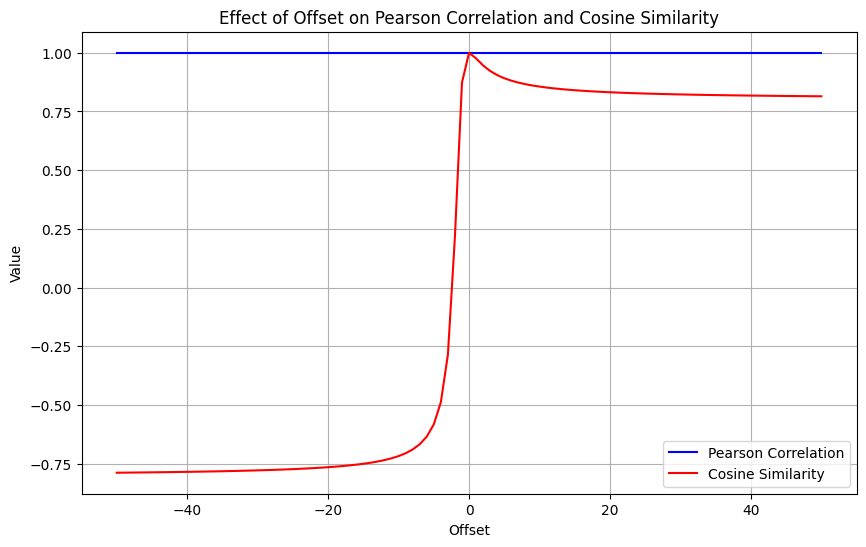

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 피어슨 상관계수 계산 함수
def pearson_corr(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))
    return numerator / denominator

# 코사인 유사도 계산 함수
def cosine_similarity(x, y):
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    return dot_product / (norm_x * norm_y)

# 오프셋에 따른 시뮬레이션을 실행하는 함수
def offset_simulation():
    # 첫 번째 변수 (0에서 3까지의 정수)
    x = np.array([0, 1, 2, 3])

    # 오프셋 범위 (-50에서 50까지)
    offsets = np.arange(-50, 51)

    # 결과를 저장할 리스트
    pearson_results = []
    cosine_results = []

    # 오프셋을 적용하면서 피어슨 상관계수와 코사인 유사도를 계산
    for offset in offsets:
        y = x + offset
        pearson = pearson_corr(x, y)
        cosine = cosine_similarity(x, y)
        pearson_results.append(pearson)
        cosine_results.append(cosine)

    # 그래프 그리기
    plt.figure(figsize=(10, 6))

    # 피어슨 상관계수 그래프
    plt.plot(offsets, pearson_results, label='Pearson Correlation', color='b')

    # 코사인 유사도 그래프
    plt.plot(offsets, cosine_results, label='Cosine Similarity', color='r')

    # 그래프 레이블 및 제목
    plt.title('Effect of Offset on Pearson Correlation and Cosine Similarity')
    plt.xlabel('Offset')
    plt.ylabel('Value')
    plt.legend(loc='best')
    plt.grid(True)

    # 그래프 출력
    plt.show()

# 시뮬레이션 실행
offset_simulation()


### [연습문제 3-5] OPTIONAL
에지 검출기를 만들어 봅시다. 에지 검출기의 커널은 [-1 +1]로 매우 간단합니다. 일정한 시계열 신호 조각과 커널의 내적은 0입니다. 그러나 신호가 급격히 변화하면 내적이 커집니다. 여기서 작업할 신호는 평평한 함수입니다. 그래프 A와 B는 각각 커널과 신호를 보여줍니다. 이 문제에서 첫 번째 단계는 이 두 시계열을 생성하는 코드를 구현하는 것입니다.

다음으로 신호의 시점에 대해 for루프를 작성합니다. 각 시점에서 커널과 길이가 같은 시계열 데이터 조각과 커널 사이의 내적을 계산합니다. 결과는 그래프의 C와 유사해야 합니다. 에지 검출기는 신호가 평평할 때 0, 신호가 상승할 때 +1, 신호가 하강할 때 -1을 반환하는 것을 확인해보세요

이 코드를 계속 살펴보세요. 예를 들어 커널을 ([0 -1 1 -])과 같이 앞뒤에 0을 추가하면 어떤 영향을 줄까요? 커널을 [-1 1]로 뒤집으면 어떻게 될까요? 커널이 비대칭 ([-1 2])이라면 어떻게 될까요?




<ipython-input-8-39e4a5fb3309>:39: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[1].stem(kernel, use_line_collection=True, label='Kernel')


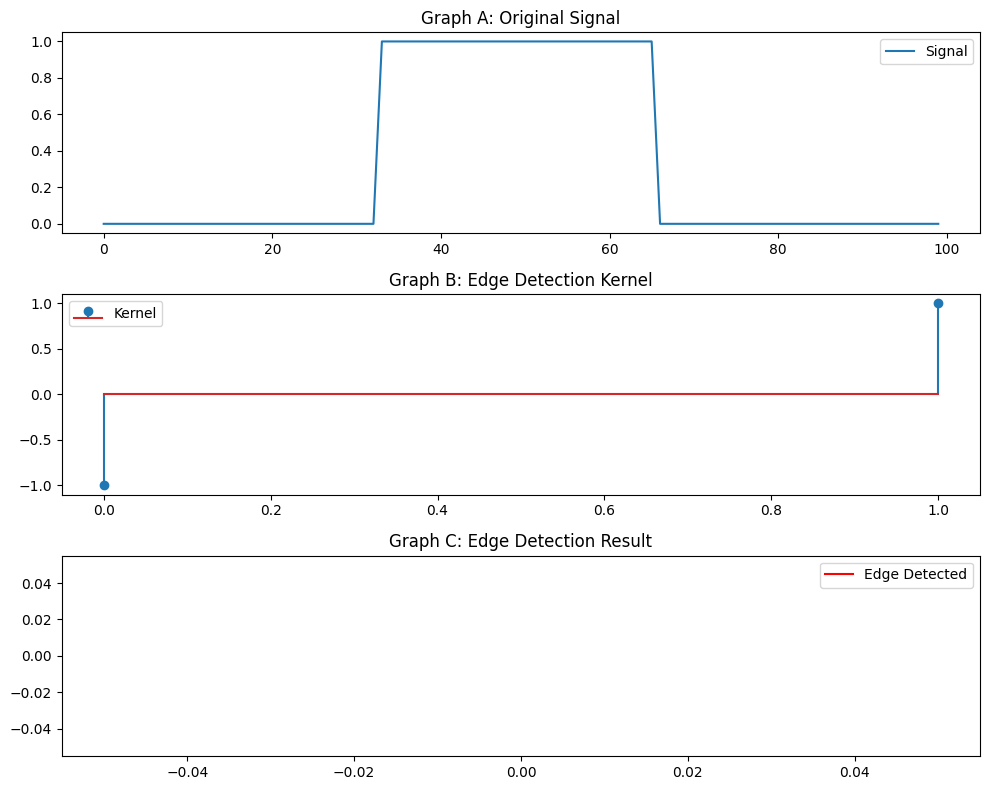

Using kernel: [-1, 1]


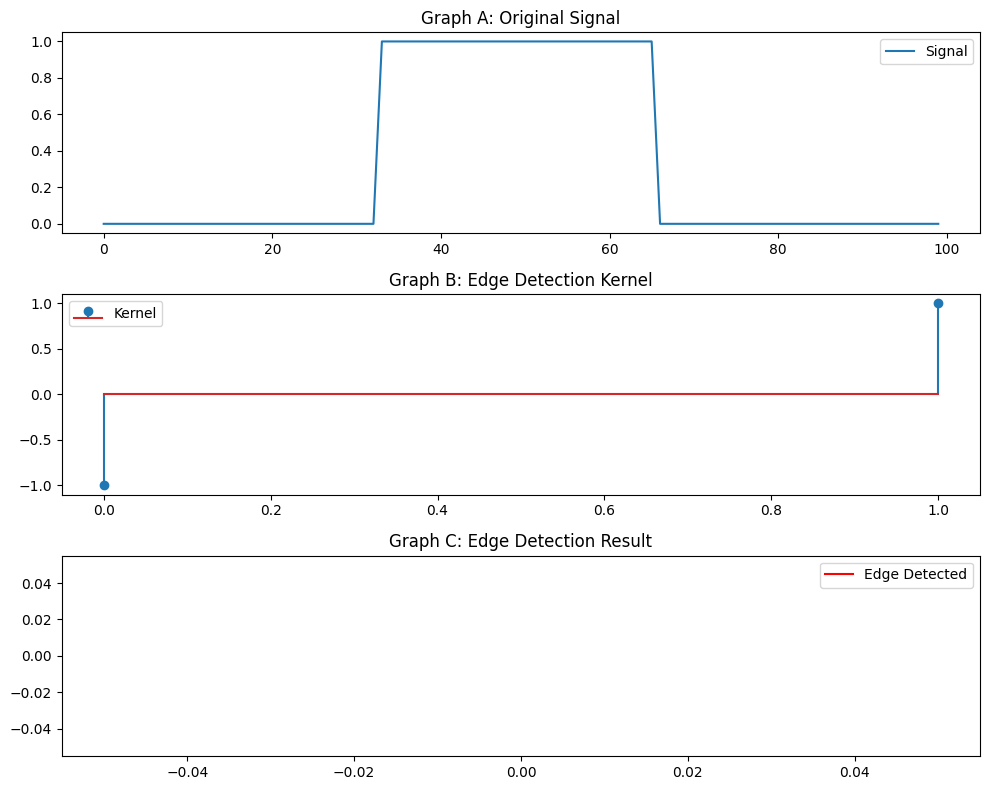

Using kernel: [0, -1, 1]


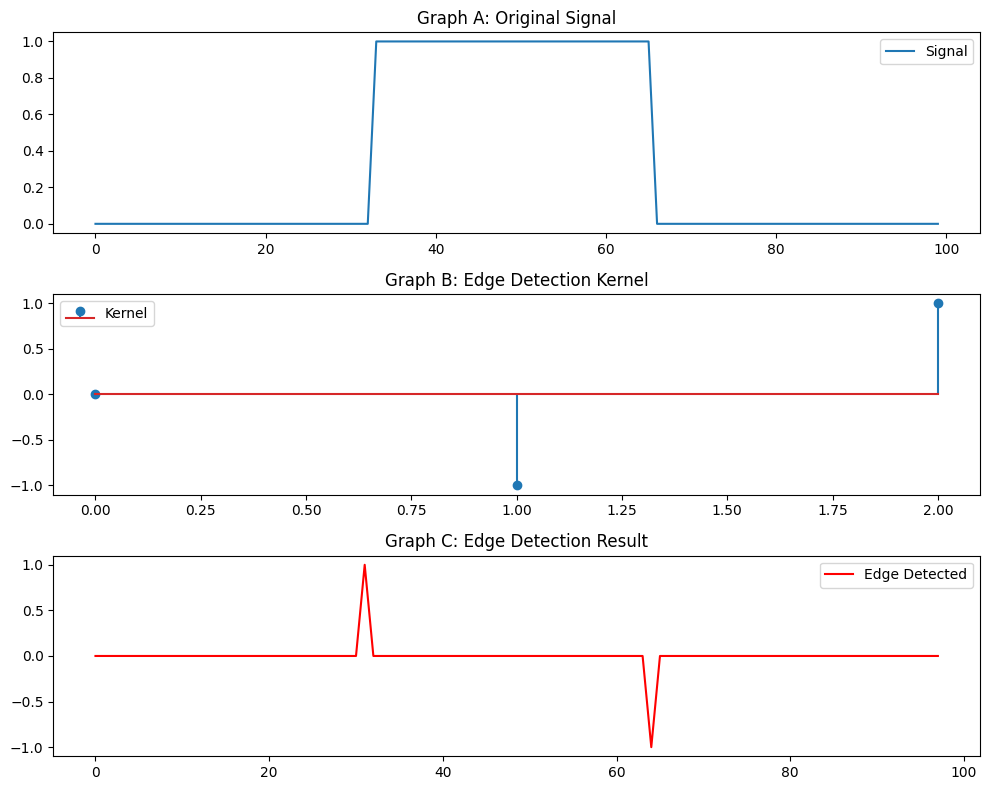

Using kernel: [-1, 1] (reversed)


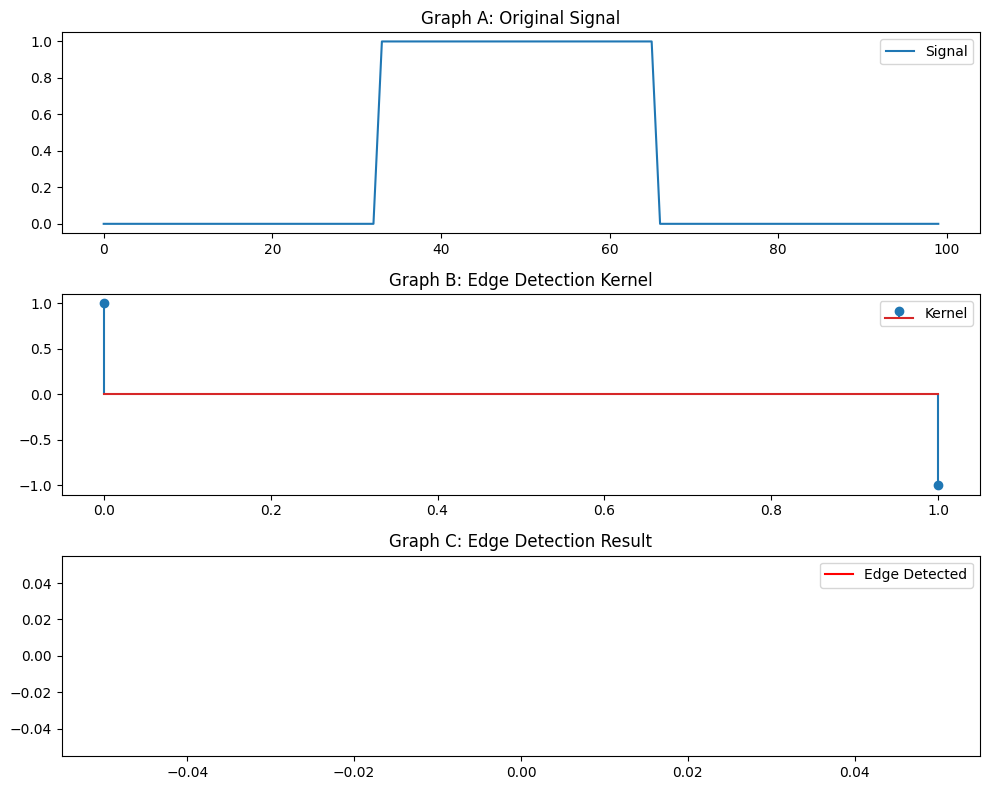

Using kernel: [-1, 2] (asymmetric)


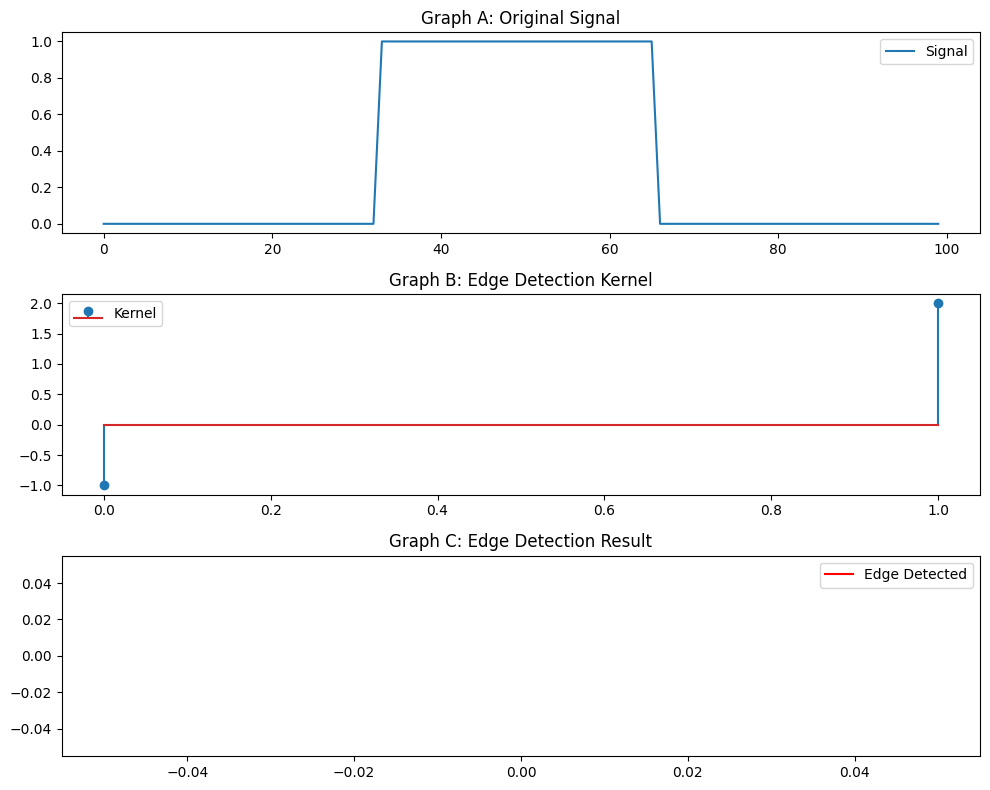

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시뮬레이션을 위한 신호 생성
def generate_signal(length):
    # 평평한 신호 (일부 구간에서만 변화)
    signal = np.zeros(length)
    signal[length // 3:length // 3 * 2] = 1
    return signal

# 커널과 시계열 데이터의 내적을 계산하는 함수
def apply_edge_detector(signal, kernel):
    kernel_length = len(kernel)
    half_k = kernel_length // 2

    # 결과 저장 리스트
    edge_detected = []

    # 신호에서 커널 길이만큼의 구간을 선택하여 내적 계산
    for i in range(half_k, len(signal) - half_k):
        signal_segment = signal[i - half_k:i + half_k + 1]

        # 커널과 신호 조각의 내적을 계산
        if len(signal_segment) == kernel_length:
            edge_detected.append(np.dot(kernel, signal_segment))

    return np.array(edge_detected)

# 그래프를 그리는 함수
def plot_results(signal, kernel, edge_detected):
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))

    # 그래프 A: 신호
    axs[0].plot(signal, label='Signal')
    axs[0].set_title('Graph A: Original Signal')
    axs[0].legend()

    # 그래프 B: 커널
    axs[1].stem(kernel, use_line_collection=True, label='Kernel')
    axs[1].set_title('Graph B: Edge Detection Kernel')
    axs[1].legend()

    # 그래프 C: 에지 검출 결과
    axs[2].plot(edge_detected, label='Edge Detected', color='r')
    axs[2].set_title('Graph C: Edge Detection Result')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

# 기본 커널과 신호로 에지 검출기를 구현하는 메인 함수
def edge_detection_simulation():
    # 신호 생성
    signal = generate_signal(100)

    # 커널 정의
    kernel = np.array([-1, 1])  # 간단한 에지 검출 커널 [-1, +1]

    # 에지 검출 적용
    edge_detected = apply_edge_detector(signal, kernel)

    # 결과 시각화
    plot_results(signal, kernel, edge_detected)

# 시뮬레이션 실행
edge_detection_simulation()

# 커널을 변경하는 시뮬레이션
def test_various_kernels():
    signal = generate_signal(100)

    # 다양한 커널
    kernels = {
        "[-1, 1]": np.array([-1, 1]),
        "[0, -1, 1]": np.array([0, -1, 1]),
        "[-1, 1] (reversed)": np.array([1, -1]),
        "[-1, 2] (asymmetric)": np.array([-1, 2])
    }

    # 커널별 결과 시각화
    for kernel_name, kernel in kernels.items():
        edge_detected = apply_edge_detector(signal, kernel)
        print(f"Using kernel: {kernel_name}")
        plot_results(signal, kernel, edge_detected)

# 다양한 커널을 테스트하는 함수 실행
test_various_kernels()

